In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import random, math
import matplotlib.pyplot as plt

In [2]:
path_age_data = './storage/age_data_2005.xls'
sheet2m = 'm; 2010-50, medium-fertility'
sheet2f = 'f; 2010-50, medium-fertility'

In [3]:
choosenCountryName = 'Kazakhstan'
choosenCountryCode = 398

In [4]:
cols = [
    'Index', 'Variant', 'Area', 'Notes',
    'Country_code', 'Reference_date',
    '0 - 4', '5 - 9', '10 - 14', '15 - 19',
    '20 - 24', '25 - 29', '30 - 34', '35 - 39',
    '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64',
    '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94',
    '95 - 99', '100+'
]
print(len(cols))
cols_ext_period = [ 'Reference_date', 'Sex',
    '0 - 4', '5 - 9', '10 - 14', '15 - 19',
    '20 - 24', '25 - 29', '30 - 34', '35 - 39',
    '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64',
    '65 - 69', '70 - 74', '75 - 79', '80 - 84'
    # ,'85 - 89', '90 - 94', '95 - 99', '100+'
]
print(len(cols_ext_period))
cols_period = [
    '0 - 4', '5 - 9', '10 - 14', '15 - 19',
    '20 - 24', '25 - 29', '30 - 34', '35 - 39',
    '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64',
    '65 - 69', '70 - 74', '75 - 79', '80 - 84'
    # ,'85 - 89', '90 - 94', '95 - 99', '100+'
]
print(len(cols_period))


27
19
17


# Getting data

In [5]:
dff = pd.read_excel(path_age_data, sheet_name=sheet2f)
dff.columns = cols
dff.dropna(subset=['Index', 'Variant', 'Area'], inplace=True)
dff = dff.iloc[1: , :]
dff['Sex'] = 'f'
dff

,Index,Variant,Area,Notes,Country_code,Reference_date,0 - 4,5 - 9,10 - 14,15 - 19,...,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+,Sex
6,0,Medium,WORLD,NaN,900,2010,308533.785,294657.693,290611.684,292432.301,...,122511.733,93635.052,78326.444,57164.141,38045.161,19800.176,7011.671,2016.854,321.32,f
7,0,Medium,WORLD,NaN,900,2015,315805.329,303018.991,292885.218,289573.031,...,148308.309,113789.754,82929.566,64238.548,41702.109,23263.384,9596.496,2454.44,462.89,f
8,0,Medium,WORLD,NaN,900,2020,315649.009,310982.69,301400.962,291929.141,...,162404.154,138320.502,101618.805,68871.533,47477.582,26057.288,11572.483,3504.545,610.63,f
9,0,Medium,WORLD,NaN,900,2025,310182.964,311508.632,309625.656,300538.936,...,185253.907,152021.971,124167.813,85350.823,51795.206,30199.413,13335.882,4375.202,889.925,f
10,0,Medium,WORLD,NaN,900,2030,304844.9,306661.641,310398.204,308865.187,...,204234.111,174135.457,137163.773,104977.138,65159.676,33746.3,15799.698,5229.787,1183.059,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,259,Medium,Tonga,NaN,776,2030,3.893,3.86,4.279,3.98,...,2.447,1.328,1.254,1.012,0.632,0.359,0.143,0.043,0.007,f
2027,259,Medium,Tonga,NaN,776,2035,3.419,3.483,3.896,3.6,...,2.103,1.881,1.34,1.054,0.761,0.397,0.175,0.048,0.009,f
2028,259,Medium,Tonga,NaN,776,2040,2.88,3.011,3.519,3.218,...,2.352,1.567,1.844,1.134,0.801,0.486,0.197,0.06,0.01,f
2029,259,Medium,Tonga,NaN,776,2045,2.379,2.473,3.047,2.841,...,3.062,1.807,1.568,1.571,0.871,0.519,0.247,0.069,0.013,f


In [6]:
dfm = pd.read_excel(path_age_data, sheet_name=sheet2m)
dfm.columns = cols
dfm.dropna(subset=['Index', 'Variant', 'Area'], inplace=True)
dfm = dfm.iloc[1: , :]
dfm['Sex'] = 'm'
dfm

,Index,Variant,Area,Notes,Country_code,Reference_date,0 - 4,5 - 9,10 - 14,15 - 19,...,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+,Sex
6,0,Medium,WORLD,NaN,900,2010,324453.051,310015.285,306138.861,308097.76,...,115546.475,83920.135,64827.917,43392.716,24623.641,10130.297,2814.41,579.507,70.612,m
7,0,Medium,WORLD,NaN,900,2015,332039.152,318537.914,308006.748,304640.396,...,140169.446,102584.743,69794.857,48624.43,27908.199,12593.943,3801.933,710.932,96.705,m
8,0,Medium,WORLD,NaN,900,2020,331693.21,326749.369,316675.114,306600.863,...,154172.517,125079.555,86125.931,53234.511,31788.912,14568.028,4848.809,984.569,122.498,m
9,0,Medium,WORLD,NaN,900,2025,325721.711,327066.55,325143.53,315364.115,...,175198.142,138300.977,105630.162,66460.298,35498.631,16928.036,5737.2,1290.96,168.187,m
10,0,Medium,WORLD,NaN,900,2030,319583.011,321714.812,325704.853,323932.697,...,194019.158,158169.25,117664.376,82109.358,45013.187,19405.719,6846.228,1568.629,224.869,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,259,Medium,Tonga,NaN,776,2030,4.067,4.148,4.404,4.259,...,2.627,1.814,1.265,0.955,0.504,0.245,0.086,0.016,0.002,m
2027,259,Medium,Tonga,NaN,776,2035,3.567,3.748,3.995,3.855,...,2.204,2.38,1.54,0.964,0.63,0.262,0.091,0.02,0.002,m
2028,259,Medium,Tonga,NaN,776,2040,2.997,3.249,3.596,3.447,...,2.524,2.015,2.032,1.188,0.645,0.335,0.1,0.022,0.002,m
2029,259,Medium,Tonga,NaN,776,2045,2.467,2.68,3.097,3.048,...,3.182,2.316,1.738,1.585,0.807,0.35,0.131,0.024,0.003,m


In [7]:
df = dfm.append(dff)
df

,Index,Variant,Area,Notes,Country_code,Reference_date,0 - 4,5 - 9,10 - 14,15 - 19,...,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+,Sex
6,0,Medium,WORLD,NaN,900,2010,324453.051,310015.285,306138.861,308097.76,...,115546.475,83920.135,64827.917,43392.716,24623.641,10130.297,2814.41,579.507,70.612,m
7,0,Medium,WORLD,NaN,900,2015,332039.152,318537.914,308006.748,304640.396,...,140169.446,102584.743,69794.857,48624.43,27908.199,12593.943,3801.933,710.932,96.705,m
8,0,Medium,WORLD,NaN,900,2020,331693.21,326749.369,316675.114,306600.863,...,154172.517,125079.555,86125.931,53234.511,31788.912,14568.028,4848.809,984.569,122.498,m
9,0,Medium,WORLD,NaN,900,2025,325721.711,327066.55,325143.53,315364.115,...,175198.142,138300.977,105630.162,66460.298,35498.631,16928.036,5737.2,1290.96,168.187,m
10,0,Medium,WORLD,NaN,900,2030,319583.011,321714.812,325704.853,323932.697,...,194019.158,158169.25,117664.376,82109.358,45013.187,19405.719,6846.228,1568.629,224.869,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,259,Medium,Tonga,NaN,776,2030,3.893,3.86,4.279,3.98,...,2.447,1.328,1.254,1.012,0.632,0.359,0.143,0.043,0.007,f
2027,259,Medium,Tonga,NaN,776,2035,3.419,3.483,3.896,3.6,...,2.103,1.881,1.34,1.054,0.761,0.397,0.175,0.048,0.009,f
2028,259,Medium,Tonga,NaN,776,2040,2.88,3.011,3.519,3.218,...,2.352,1.567,1.844,1.134,0.801,0.486,0.197,0.06,0.01,f
2029,259,Medium,Tonga,NaN,776,2045,2.379,2.473,3.047,2.841,...,3.062,1.807,1.568,1.571,0.871,0.519,0.247,0.069,0.013,f


In [8]:
d_splited = df[ df['Country_code']==choosenCountryCode ][cols_ext_period]
d_splited

,Reference_date,Sex,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84
744,2010,m,551.44,527.118,532.465,620.22,778.31,637.738,567.77,523.364,432.198,503.798,425.954,351.155,184.392,131.194,168.297,64.555,48.55
745,2015,m,560.964,535.575,510.62,513.625,598.343,753.341,612.803,539.539,493.586,402.865,462.056,379.858,297.755,146.689,96.529,110.456,35.265
746,2020,m,529.328,545.992,519.458,492.345,493.513,577.038,727.52,584.873,510.888,463.401,370.099,415.447,325.547,241.842,110.007,64.368,62.016
747,2025,m,477.05,515.627,530.16,501.498,473.038,474.543,555.616,699.145,556.856,482.175,429.368,334.252,359.579,267.264,184.495,74.449,36.549
748,2030,m,432.262,464.478,500.129,512.439,482.632,455.06,455.637,531.765,670.298,528.565,449.493,391.097,290.714,298.047,206.016,126.831,42.949
749,2035,m,412.229,420.541,449.313,482.758,493.958,465.22,437.215,434.351,507.883,640.501,495.845,412.113,343.448,242.355,232.052,143.335,74.471
750,2040,m,407.092,401.026,405.625,432.285,464.814,477.01,447.946,416.953,413.271,484.482,605.008,457.594,364.654,289.113,190.109,163.421,85.416
751,2045,m,396.271,396.252,386.269,388.865,414.888,448.552,460.229,428.237,396.955,393.521,457.616,562.101,407.925,309.355,229.04,135.191,98.719
752,2050,m,370.329,385.729,381.596,369.668,371.874,399.296,432.476,440.966,408.75,378.515,371.615,425.973,505.132,348.904,247.346,164.874,82.751
744,2010,f,531.77,511.709,514.952,599.523,765.301,635.753,597.109,546.17,468.756,571.169,504.985,453.326,251.553,210.912,279.557,117.081,122.937


In [9]:
dmal = d_splited[ d_splited['Sex']=='m' ]
print(dmal)
dfem = d_splited[ d_splited['Sex']=='f' ]
print(dfem)

    Reference_date Sex    0 - 4    5 - 9  10 - 14  15 - 19  20 - 24  25 - 29  \
744           2010   m   551.44  527.118  532.465   620.22   778.31  637.738   
745           2015   m  560.964  535.575   510.62  513.625  598.343  753.341   
746           2020   m  529.328  545.992  519.458  492.345  493.513  577.038   
747           2025   m   477.05  515.627   530.16  501.498  473.038  474.543   
748           2030   m  432.262  464.478  500.129  512.439  482.632   455.06   
749           2035   m  412.229  420.541  449.313  482.758  493.958   465.22   
750           2040   m  407.092  401.026  405.625  432.285  464.814   477.01   
751           2045   m  396.271  396.252  386.269  388.865  414.888  448.552   
752           2050   m  370.329  385.729  381.596  369.668  371.874  399.296   

     30 - 34  35 - 39  40 - 44  45 - 49  50 - 54  55 - 59  60 - 64  65 - 69  \
744   567.77  523.364  432.198  503.798  425.954  351.155  184.392  131.194   
745  612.803  539.539  493.586  402.865  

In [10]:
db = d_splited.groupby(by=['Reference_date'])[cols_period].sum()
db.insert(0, 'Reference_date', db.index)
db.reset_index(drop=True, inplace=True)
db

,Reference_date,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84
0,2010,1083.210,1038.827,1047.417,1219.743,1543.611,1273.491,1164.879,1069.534,900.954,1074.967,930.939,804.481,435.945,342.106,447.854,181.636,171.487
1,2015,1100.928,1054.388,1006.961,1011.618,1181.631,1504.670,1233.877,1118.677,1021.945,855.495,1011.310,860.484,718.314,370.612,273.860,327.761,113.283
2,2020,1038.260,1073.427,1023.033,971.948,976.057,1147.780,1464.101,1188.397,1072.563,975.470,804.889,940.205,773.654,621.453,300.009,202.734,210.468
3,2025,934.469,1012.770,1042.493,988.499,937.593,945.367,1112.908,1417.998,1143.286,1027.823,923.124,749.692,851.065,673.955,511.623,224.448,131.866
4,2030,845.448,910.757,982.327,1008.322,954.812,908.228,913.703,1072.727,1371.664,1099.323,976.985,864.592,679.873,746.537,558.950,389.687,147.902
5,2035,805.197,823.077,880.799,948.670,975.216,926.220,877.911,876.863,1033.163,1325.470,1048.772,919.305,789.062,597.912,623.824,429.599,261.922
6,2040,794.318,783.622,793.470,847.619,916.296,947.196,896.578,842.336,841.036,995.879,1270.840,990.439,843.677,698.542,501.647,484.327,292.428
7,2045,772.460,773.278,754.231,760.653,815.974,889.124,918.108,861.639,807.879,808.765,953.509,1205.751,912.682,751.438,590.390,391.894,333.865
8,2050,721.326,751.882,744.025,721.630,729.558,789.661,860.903,883.688,827.808,777.350,773.366,904.831,1117.383,816.533,639.791,465.271,272.602


In [11]:
dp = pd.DataFrame(db)
dp['Popularity'] = dp[cols_period].sum(axis=1)
dp = dp[['Reference_date', 'Popularity']]
dp

,Reference_date,Popularity
0,2010,14731.081
1,2015,14765.814
2,2020,14784.448
3,2025,14628.979
4,2030,14431.837
5,2035,14142.982
6,2040,13740.250
7,2045,13301.640
8,2050,12797.608


In [12]:
d_surv_rate_m = pd.read_csv('./storage/intermediante/surv_rate_m.csv', index_col='index')
d_surv_rate_len = len(d_surv_rate_m.columns)
print(d_surv_rate_len)
d_surv_rate_m.values[0]

16


array([0.97331023, 0.96990711, 0.96421018, 0.96084303, 0.96439333,
       0.96572469, 0.95442255, 0.94689726, 0.93884551, 0.91866754,
       0.89912695, 0.85702289, 0.8122181 , 0.74993353, 0.66682551,
       0.56145433])

In [13]:
d_surv_rate_f = pd.read_csv('./storage/intermediante/surv_rate_f.csv', index_col='index')
d_surv_rate_f

,0 - 4/5 - 9,5 - 9/10 - 14,10 - 14/15 - 19,15 - 19/20 - 24,20 - 24/25 - 29,25 - 29/30 - 34,30 - 34/35 - 39,35 - 39/40 - 44,40 - 44/45 - 49,45 - 49/50 - 54,50 - 54/55 - 59,55 - 59/60 - 64,60 - 64/65 - 69,65 - 69/70 - 74,70 - 74/75 - 79,75 - 79/80 - 84
index,,,,,,,,,,,,,,,,
0,0.97331,0.969907,0.96421,0.960843,0.964393,0.965725,0.954423,0.946897,0.938846,0.918668,0.899127,0.857023,0.812218,0.749934,0.666826,0.561454


# Model

In [14]:
# args - 
# prev_record_m = dmal.iloc[-1].values
prev_record_f = dfem.iloc[-1].values
# surv_rate_m = d_surv_rate_m.values[0]
# surv_rate_f = d_surv_rate_f.values[0]
prev_record_f.tolist()

[2050,
 'f',
 350.997,
 366.153,
 362.429,
 351.962,
 357.684,
 390.365,
 428.427,
 442.722,
 419.058,
 398.835,
 401.751,
 478.858,
 612.251,
 467.629,
 392.445,
 300.397,
 189.851]

In [15]:
# args - 
def Model(args, year, prev_record_m=None, prev_record_f=None):
    """
    coef_fertility = args[0]

    coef_bg_ratio_m = args[1]

    coef_bg_ratio_f = args[2]

    surv_rate_m = args[3:3+d_surv_rate_len] 
    
    surv_rate_f = args[3+d_surv_rate_len:]
    """

    if (prev_record_m == None or prev_record_f == None):
        # print('prev_record_m == None or prev_record_f == None')
        raise Exception('prev_record_m == None or prev_record_f == None')

    # year = year-5
    # prev_record_m = dmal [ dmal.Reference_date==year ].values.tolist()[0]
    # prev_record_f = dfem [ dfem.Reference_date==year ].values.tolist()[0]

    # prev_record_m = dmal [ dmal.Reference_date==year ].values.tolist()
    # prev_record_f = dfem [ dfem.Reference_date==year ].values.tolist()

    # print(prev_record_m)
    # print(prev_record_f)

    coef_fertility = args[0]
    coef_bg_ratio_m = args[1]
    coef_bg_ratio_f = args[2]
    surv_rate_m = args[3:3+d_surv_rate_len]
    surv_rate_f = args[3+d_surv_rate_len:]

    # res = pd.DataFrame([], columns=model_cols)
    # res.Reference_date = start_year
    
    resm = []
    resf = []
    
    resm.append(prev_record_m[0]+5)
    resf.append(prev_record_f[0]+5)

    resm.append('m')
    resf.append('f')

    tmpm = []
    for prev_period, rate in zip(prev_record_m[2:], surv_rate_m):
        alive_predict_m = (prev_period * rate)
        
        tmpm.append(alive_predict_m)
        continue
    # print('len(tmpm)', len(tmpm))

    tmpf = []
    for prev_period, rate in zip(prev_record_f[2:], surv_rate_f):
        alive_predict_f = (prev_period * rate)
        
        tmpf.append(alive_predict_f)
        continue
    # print('len(tmpf)', len(tmpf))

    women_amount = sum(tmpf[5:9])

    birthsm = (women_amount * coef_fertility) * coef_bg_ratio_m
    resm.append(birthsm)

    birthsf = (women_amount * coef_fertility) * coef_bg_ratio_f
    resf.append(birthsf)

    [resm.append(i) for i in tmpm]
    [resf.append(i) for i in tmpf]

    # print(cols_ext_period)
    # print(len(output[0]), output[0])
    # print(len(output[1]), output[1])

    pred_male = pd.DataFrame([resm], columns=cols_ext_period)
    pred_female = pd.DataFrame([resf], columns=cols_ext_period)
      

    pred = pd.DataFrame([], columns=cols_ext_period)
    pred = pred.append(pred_female)
    pred = pred.append(pred_male)
    pred_both = pred.groupby(by=['Reference_date'])[cols_period].sum()
    # pred_both.insert(0, 'Reference_date', pred_both.index)
    # pred_both.reset_index(drop=True, inplace=True)
    # print(pred_both)
    res = pred_both[cols_period].sum(axis=1)

    # print(res.values[0])


    return res.values[0]

In [16]:
# args - 
def Model2(args, years=range(2015, 2051, 5), prev_record_m:pd.DataFrame=None, prev_record_f:pd.DataFrame=None):
    """
    coef_fertility = args[0]

    coef_bg_ratio_m = args[1]

    coef_bg_ratio_f = args[2]

    surv_rate_m = args[3:3+d_surv_rate_len] 
    
    surv_rate_f = args[3+d_surv_rate_len:]
    """

    # if (prev_record_m.isnull() or prev_record_f.isnull()):
    #     # print('prev_record_m == None or prev_record_f == None')
    #     raise Exception('prev_record_m.isnull() or prev_record_f.isnull()')

    coef_fertility = args[0]
    coef_bg_ratio_m = args[1]
    coef_bg_ratio_f = args[2]
    surv_rate_m = args[3:3+d_surv_rate_len]
    surv_rate_f = args[3+d_surv_rate_len:]

    res = []

    for year in years:

        prev_year = year-5
        # t = prev_record_m[prev_record_m.Reference_date==prev_year].values.tolist()
        bufm = prev_record_m[prev_record_m.Reference_date==prev_year].values.tolist()[0]
        buff = prev_record_f[prev_record_f.Reference_date==prev_year].values.tolist()[0]

        resm = []
        resf = []
        
        resm.append(year)
        resf.append(year)

        resm.append('m')
        resf.append('f')

        tmpm = []
        for prev_period, rate in zip(bufm[2:], surv_rate_m):
            alive_predict_m = (prev_period * rate)
            
            tmpm.append(alive_predict_m)
            continue
        # print('len(tmpm)', len(tmpm))

        tmpf = []
        for prev_period, rate in zip(buff[2:], surv_rate_f):
            alive_predict_f = (prev_period * rate)
            
            tmpf.append(alive_predict_f)
            continue
        # print('len(tmpf)', len(tmpf))

        women_amount = sum(tmpf[5:9])

        birthsm = (women_amount * coef_fertility) * coef_bg_ratio_m
        resm.append(birthsm)

        birthsf = (women_amount * coef_fertility) * coef_bg_ratio_f
        resf.append(birthsf)

        [resm.append(i) for i in tmpm]
        [resf.append(i) for i in tmpf]

        # print(cols_ext_period)
        # print(len(output[0]), output[0])
        # print(len(output[1]), output[1])

        pred_male = pd.DataFrame([resm], columns=cols_ext_period)
        pred_female = pd.DataFrame([resf], columns=cols_ext_period)

        pred = pd.DataFrame([], columns=cols_ext_period)
        pred = pred.append(pred_female)
        pred = pred.append(pred_male)
        pred_both = pred.groupby(by=['Reference_date'])[cols_period].sum()
        # pred_both.insert(0, 'Reference_date', pred_both.index)
        # pred_both.reset_index(drop=True, inplace=True)
        # print(pred_both)
        t1 = pred_both[cols_period].sum(axis=1).values[0]
        # t2 = pred_both[cols_period].sum(axis=0).values
        # t3 = pred_both[cols_period].sum().values
        # [print(i) for i in [t1,t2,t3]]
        res.append(t1)

        prev_record_m = prev_record_m.append(pred_male)
        prev_record_f = prev_record_f.append(pred_female)

        # print(res.values[0])

        continue


    # print(res)
    return res

# 1 task

Perform a **sensitivity analysis** for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.

In [17]:
def problem_gen(vals, keys=None, print_res=False):
    problem = {
        'num_vars': len(vals)
    }

    if keys == None:
        keys = [f"x{i}" for i in range(1,len(vals)+1)]
        print('Keys setted as default:', keys)
        pass

    tmp_names = []
    tmp_bounds = []
    for key, val in zip(keys, vals):
        tmp_names.append(key)
        tmp_bounds.append(val)
        continue
        
    problem['names'] = tmp_names
    problem['bounds'] = tmp_bounds

    if print_res:
        print(problem)

    return problem

# 2 task

Define ranges of model parameter values ​​from data for previous periods (1950-2000)

In [18]:
def calc_surv_rates_mean(data, labels, sex):
    surv_rates = pd.DataFrame([], columns=['Referenced_date', 'Sex', *labels])
    # surv_rates_m = pd.DataFrame([], columns=col2)
    # surv_rates

    tmp_survs = []
    for row_ind in range(1, data.shape[0]):

        year_cur_data = data.iloc[row_ind-1]
        year_next_data = data.iloc[row_ind]
        coefs = []
        for col_ind in range(1, len(cols_period)):
            cur_alive = year_cur_data[cols_period[col_ind-1]]
            next_alive = year_next_data[cols_period[col_ind]]
            # print(cur_alive, next_alive)

            coefs.append(next_alive/cur_alive)

            continue
        # print('===============', coefs)

        tmp_rec = pd.DataFrame([[int(data.iloc[row_ind].Reference_date), sex,
                                # 0,
                                *coefs]], columns=['Referenced_date', 'Sex', *labels])
        # print(tmp_rec)
        
        surv_rates = surv_rates.append(tmp_rec)

        continue

    return surv_rates


In [19]:
labels = [f"{cols_period[i-1]}/{cols_period[i]}" for i in range(1,len(cols_period)) ]
print(labels)

['0 - 4/5 - 9', '5 - 9/10 - 14', '10 - 14/15 - 19', '15 - 19/20 - 24', '20 - 24/25 - 29', '25 - 29/30 - 34', '30 - 34/35 - 39', '35 - 39/40 - 44', '40 - 44/45 - 49', '45 - 49/50 - 54', '50 - 54/55 - 59', '55 - 59/60 - 64', '60 - 64/65 - 69', '65 - 69/70 - 74', '70 - 74/75 - 79', '75 - 79/80 - 84']


In [20]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


In [21]:
surv_male_ranges = calc_surv_rates_mean(dmal, labels, 'm')
min_max_surv_male = surv_male_ranges.describe().loc[['min','max']]
min_max_surv_male


,0 - 4/5 - 9,5 - 9/10 - 14,10 - 14/15 - 19,15 - 19/20 - 24,20 - 24/25 - 29,25 - 29/30 - 34,30 - 34/35 - 39,35 - 39/40 - 44,40 - 44/45 - 49,45 - 49/50 - 54,50 - 54/55 - 59,55 - 59/60 - 64,60 - 64/65 - 69,65 - 69/70 - 74,70 - 74/75 - 79,75 - 79/80 - 84
min,0.971230,0.963013,0.957022,0.956306,0.961561,0.960160,0.950277,0.943103,0.932131,0.917145,0.891782,0.84793,0.795528,0.735773,0.656316,0.546278
max,0.974116,0.971003,0.966574,0.964727,0.967919,0.965725,0.960998,0.958740,0.955547,0.944586,0.930853,0.89865,0.855314,0.799554,0.719848,0.612104


In [22]:
minmax_male_vals = [[i,j] for i, j in zip(min_max_surv_male.values[0], min_max_surv_male.values[1])]
minmax_male_vals


[[0.971229870883505, 0.9741162379469818],
 [0.9630134358943299, 0.9710032381426834],
 [0.9570221788442769, 0.9665742417383432],
 [0.9563061730934901, 0.9647270323433619],
 [0.9615612962576467, 0.9679189526024335],
 [0.960159564043722, 0.9657246851027622],
 [0.9502774010602885, 0.9609976358038267],
 [0.9431026971667902, 0.9587396033726909],
 [0.9321306438252839, 0.9555466374657242],
 [0.9171453638164502, 0.9445855666111374],
 [0.8917817416904172, 0.9308525051571624],
 [0.8479304011049252, 0.8986498867641225],
 [0.7955280055533862, 0.8553140895998038],
 [0.735772977422748, 0.7995539105558339],
 [0.6563159176931259, 0.7198480614739784],
 [0.5462783672837115, 0.6121043560592051]]

In [23]:
surv_female_ranges = calc_surv_rates_mean(dfem, labels, 'f')
min_max_surv_female = surv_female_ranges.describe().loc[['min','max']]
min_max_surv_female

,0 - 4/5 - 9,5 - 9/10 - 14,10 - 14/15 - 19,15 - 19/20 - 24,20 - 24/25 - 29,25 - 29/30 - 34,30 - 34/35 - 39,35 - 39/40 - 44,40 - 44/45 - 49,45 - 49/50 - 54,50 - 54/55 - 59,55 - 59/60 - 64,60 - 64/65 - 69,65 - 69/70 - 74,70 - 74/75 - 79,75 - 79/80 - 84
min,0.973322,0.961284,0.956517,0.962064,0.973270,0.972434,0.965253,0.966009,0.965598,0.960586,0.951763,0.927719,0.890162,0.840782,0.777319,0.666359
max,0.976836,0.971367,0.967892,0.972920,0.981743,0.980371,0.975932,0.975674,0.976621,0.972062,0.966685,0.951217,0.926444,0.887718,0.831319,0.739575


In [24]:
minmax_female_vals = [[i,j] for i, j in zip(min_max_surv_female.values[0], min_max_surv_female.values[1])]
minmax_female_vals

[[0.9733219206303214, 0.97683580517633],
 [0.961283837188947, 0.9713670878876071],
 [0.956517249063762, 0.9678919765074668],
 [0.9620644022937803, 0.972920138176517],
 [0.9732700717551847, 0.9817431311340242],
 [0.9724335636399953, 0.9803707829725727],
 [0.9652526911975601, 0.9759320427760151],
 [0.9660094550087803, 0.9756737469273968],
 [0.965598307008337, 0.9766213360784527],
 [0.9605859090206129, 0.972061509352978],
 [0.9517629236511975, 0.9666852899830588],
 [0.927718683684589, 0.9512172764701313],
 [0.8901623117195979, 0.926443813557811],
 [0.8407819374905173, 0.8877179172236886],
 [0.7773191156007541, 0.8313186661131866],
 [0.666359187229354, 0.7395745277616546]]

In [25]:
flat_vector = lambda min, max, size: [[min, max] for _ in range(0, size)]
# flat_vector_custom = lambda [args]: 

# Define the model inputs
problem = problem_gen(
    vals=[
        [0.0, 1.0] # coef_fertility
        ,[0.0, 1.0] # coef_bg_ratio_m
        ,[0.0, 1.0] # coef_bg_ratio_f
        ,*minmax_male_vals # min-max of survival rates male
        ,*minmax_female_vals # min-max of survival rates female
    ],
    print_res=True
)

Keys setted as default: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35']
{'num_vars': 35, 'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35'], 'bounds': [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.971229870883505, 0.9741162379469818], [0.9630134358943299, 0.9710032381426834], [0.9570221788442769, 0.9665742417383432], [0.9563061730934901, 0.9647270323433619], [0.9615612962576467, 0.9679189526024335], [0.960159564043722, 0.9657246851027622], [0.9502774010602885, 0.9609976358038267], [0.9431026971667902, 0.9587396033726909], [0.9321306438252839, 0.9555466374657242], [0.9171453638164502, 0.9445855666111374], [0.8917817

# Evaluates

In [26]:
from datetime import datetime, timedelta

In [27]:
def Evaluate(param_values, limit=int(1e4)):
    Y = []
    c = 0
    for params in param_values:
        if (c == limit):
            break
        # x1, x2, x3 = params
        # output = Model(x1, x2, x3)
        res = Model(params)

        if res in Y:
            # print('repeat value ', res)
            # input()
            pass

        # Y.append(res[0])
        Y.append(res)
        c+=1
        continue
    return np.array(Y)

In [28]:
def Evaluate_by_param(param_values, limit=int(1e4), years=dmal.Reference_date.values.tolist()):
    Y = []
    c = 0
    counts = len(param_values)
    status_step = int(counts/100)
    print('status_step = ', status_step)
    tm = []
    for params in param_values:
        if (c == limit):
            break
        # x1, x2, x3 = params
        # output = Model(x1, x2, x3)
        
        t = datetime.now()
        reses = {}
        for year in years:
            # prev_record_m = dmal[ dmal.Reference_date==year ].values.tolist()[0]
            # prev_record_f = dfem[ dfem.Reference_date==year ].values.tolist()[0]

            reses[str(year)] = Model(params, year=year)
            continue
        tm.append(datetime.now() - t)

        # if reses in Y:
        #     # print('repeat value ', res)
        #     # input()
        #     pass

        # Y.append(res[0])
        Y.append(reses)
        c+=1
        if c % status_step:
            print(f"Status: {c}/{counts}\nMax awaiting of one param calcs: {max(tm)}")
            tm = []
        continue
    return np.array(Y)

In [29]:
def new_evaluate(param_values):
    Y = []
    # pred_years = range(2015, 2051, 5)
    pred_years = db.Reference_date.tolist()[1:]
    # pred_years = db.Reference_date.tolist()
    # print(pred_years)
    c = 0
    counts = len(param_values)
    status_step = int(counts/100)
    # print('status_step = ', status_step)
    tm = []
    result = []
    t = datetime.now()
    for param in param_values:
        buf_m = dmal[dmal.Reference_date==db.Reference_date.tolist()[0]]
        buf_f = dfem[dfem.Reference_date==db.Reference_date.tolist()[0]]
        # y = np.array([Model2(param, year, buf_m, buf_f) for year in pred_years])
        y = Model2(param, prev_record_m=buf_m, prev_record_f=buf_f)
        # print(y.shape, y)
        result.append(y)
        c+=1
        tm.append(datetime.now() - t)
        # if c % status_step == 0:
        #     print(f"Status: {c}/{counts}\nMax awaiting of one param calcs: {max(tm)}")
        #     print('='*100)
        #     tm = []
        #     t = datetime.now()
        continue
    
    print(result)
    # result = np.array(result)

    return result

In [ ]:
# Generate samples
param_values = saltelli.sample(problem, 10)

# Run model (example)
Y = {}
S = {}

Y = new_evaluate(param_values)
Ya = np.array(Y)

# Y = Evaluate(param_values)
print('evaluates passed')

In [34]:
Si = [sobol.analyze(problem, i) for i in Ya.T]
Si


[{'S1': array([ 3.83792366e-01,  9.51450470e-02, -9.12980106e-02,  1.96067778e-04,
         -1.69196053e-03,  7.18017270e-04, -1.19534632e-03, -7.72473508e-04,
         -6.79403016e-06,  5.64738886e-04,  4.78763169e-05,  2.85439301e-03,
          2.36873201e-03,  5.06137993e-03, -3.95571336e-05, -4.52465228e-03,
         -4.05901950e-05,  1.91882552e-03, -6.31343142e-04, -5.23568129e-04,
          5.93999390e-05, -7.97407804e-05, -1.52703437e-03,  2.73924354e-03,
         -8.96693262e-04,  6.24604551e-04, -5.24840415e-04, -3.38559370e-03,
         -1.59722800e-04,  1.67960573e-04,  3.04960929e-03, -1.04535894e-03,
         -4.07748325e-03,  4.40801582e-04,  1.36596080e-03]),
  'S1_conf': array([7.11644163e-01, 3.25591376e-01, 1.76435948e-01, 5.82191378e-04,
         1.33756076e-03, 1.43778889e-03, 1.79016377e-03, 1.63097453e-03,
         8.62774884e-04, 9.30096881e-04, 2.36337683e-03, 3.57809640e-03,
         4.51778275e-03, 5.25684828e-03, 8.31522980e-03, 3.36895402e-03,
         3.57

In [35]:
fr = []
bg = []
sr = []
for i in Si:
    # print([i][0]['S1'])
    tmp = [i][0]['S1']

    fr.append(tmp[0])
    bg.append(tmp[1])
    sr.append(sum(tmp[3:]))

    continue

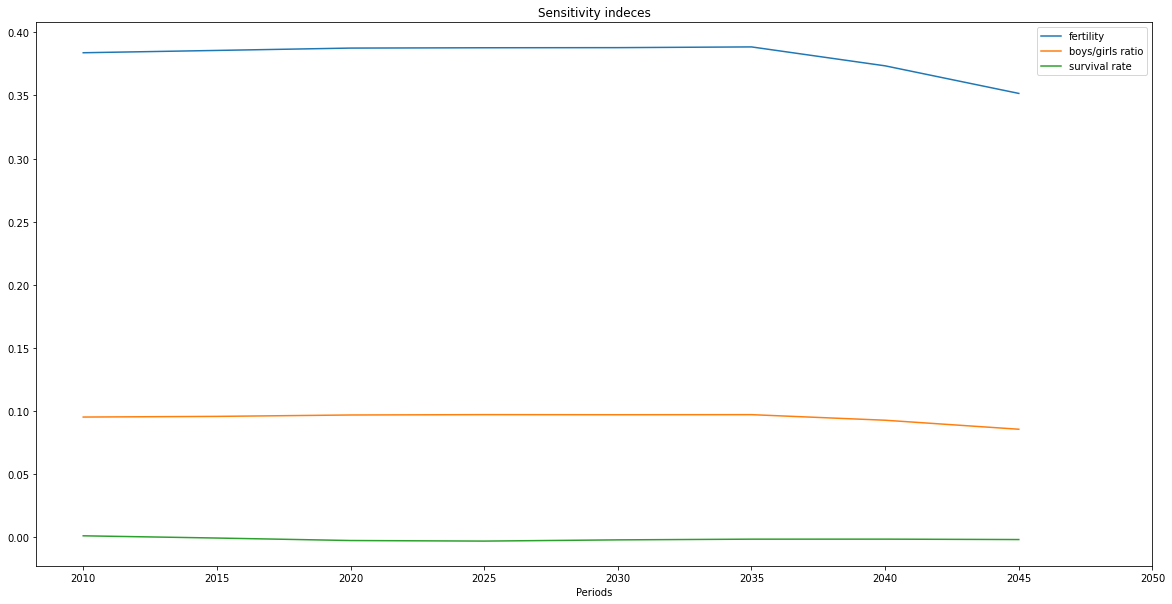

In [36]:
plt.figure(figsize=(20,10))
plt.title('Sensitivity indeces')

plt.plot(fr, label='fertility')
plt.plot(bg, label='boys/girls ratio')
plt.plot(sr, label='survival rate')

plt.xlabel('Periods')
plt.xticks(range(0, len(dp.Reference_date)), dp.Reference_date)

plt.legend()
plt.show()

- S1 - индексы чувствительности
- S2 - взаимосвязь между переменными
- ST - доверительный интервал (95)

In [ ]:
# raise Exception('stop here pls')

In [37]:
import statistics as stats

In [38]:
import matplotlib.pyplot as plt

# 3 task

Based on all ranges of parameter values, perform an **uncertainty analysis** in the form of a graph with confidence intervals of the results. The values ​​between the boundaries can be considered evenly distributed.

In [ ]:
coefs = lambda args, func, start=0, end=-1: [func(i) for i in args[start:end]]

at1 = [.4, 1.0, 1.0, *coefs(Si['S1'], lambda x: abs(x-1), start=3, end=3+d_surv_rate_len)[3:]]
at2 = [.4, 1.0, 1.0, *coefs(Si['S1'], lambda x: x+1, start=3, end=3+d_surv_rate_len)[3:]]

In [ ]:
at1
# at2

[3.0,
 1.0,
 1.0,
 0.9999918950174098,
 0.999948005795136,
 0.999980579408752,
 0.9999943373360899,
 0.9999908337061739,
 0.9999731347873586,
 1.0003549264030662,
 0.9999035016874247,
 0.999922301361011,
 0.9997005992777666,
 0.9998284046347719,
 0.9999364155222742,
 0.9999108179681571]

In [ ]:
prev_record_m = dmal[ dmal.Reference_date==2025 ].values.tolist()[0]
prev_record_f = dfem[ dfem.Reference_date==2025 ].values.tolist()[0]

# r2025 = Model(Si['S1'])
r2025 = Model()
r2025


0.40688836059760525

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
dp

,Reference_date,Popularity
0,2010,14731.081
1,2015,14765.814
2,2020,14784.448
3,2025,14628.979
4,2030,14431.837
5,2035,14142.982
6,2040,13740.250
7,2045,13301.640
8,2050,12797.608


In [ ]:
np.shape(Y)

(7200, 8)

In [44]:
years = dp.Reference_date.values.tolist()[1:]

result = Y

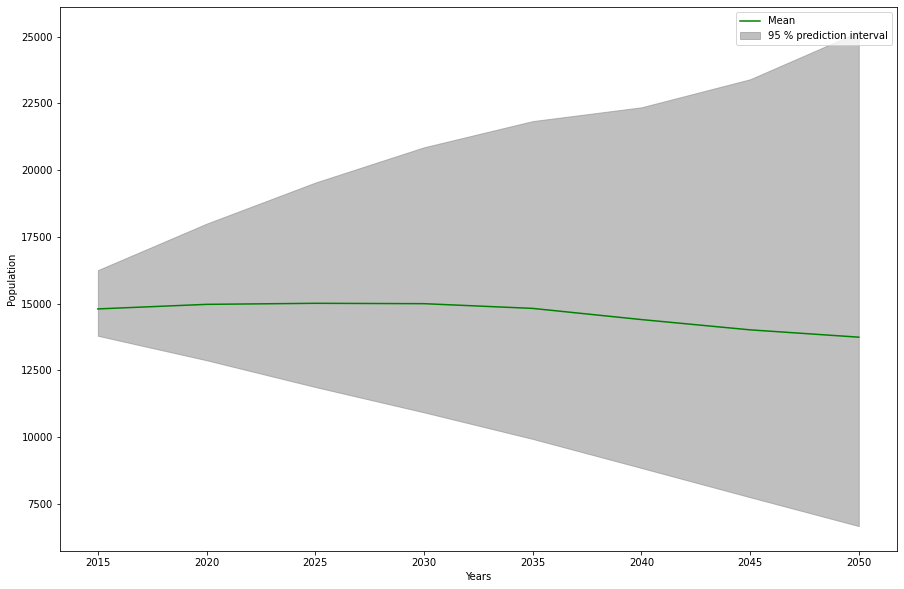

In [45]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(years, np.mean(result, axis=0), label="Mean", color='green')

# in percent
prediction_interval = 95

ax0.fill_between(years,
                 np.percentile(result, 50 - prediction_interval/2., axis=0),
                 np.percentile(result, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='grey',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("Years")
ax0.set_ylabel("Population")
ax0.legend()
plt.show()

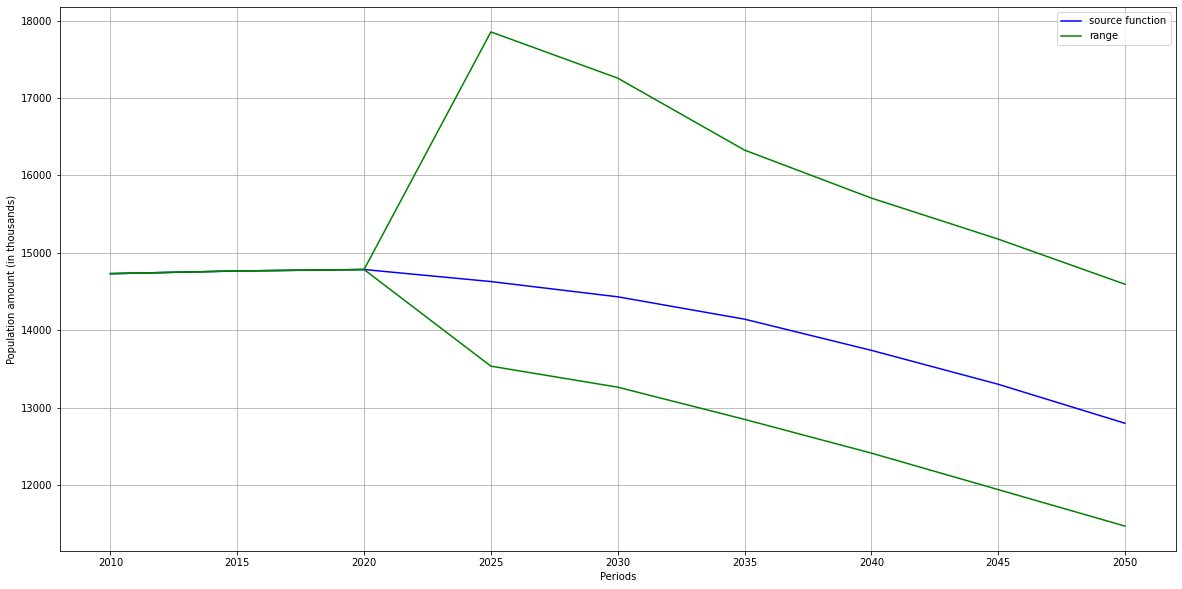

In [ ]:
plt.figure(1, figsize=(20, 10))
# plt.title(title.format(sex, year))
plt.title('')

plt.plot(dp.Popularity.values.tolist()[:], color='b')
plt.plot([*dp.Popularity.values.tolist()[:3], min(Y['2025']), min(Y['2030']),
         min(Y['2035']), min(Y['2040']), min(Y['2045']), min(Y['2050'])], color='g')
plt.plot([*dp.Popularity.values.tolist()[:3], max(Y['2025']), max(Y['2030']),
         max(Y['2035']), max(Y['2040']), max(Y['2045']), max(Y['2050'])], color='g')
# plt.plot(pred_population.Population.values.tolist(), color='g')

plt.xlabel('Periods')
plt.xticks(range(0, len(dp.Reference_date)), dp.Reference_date)

plt.ylabel('Population amount (in thousands)')

plt.legend(['source function', 'range'])
plt.grid()
plt.show()


In [ ]:
import random 


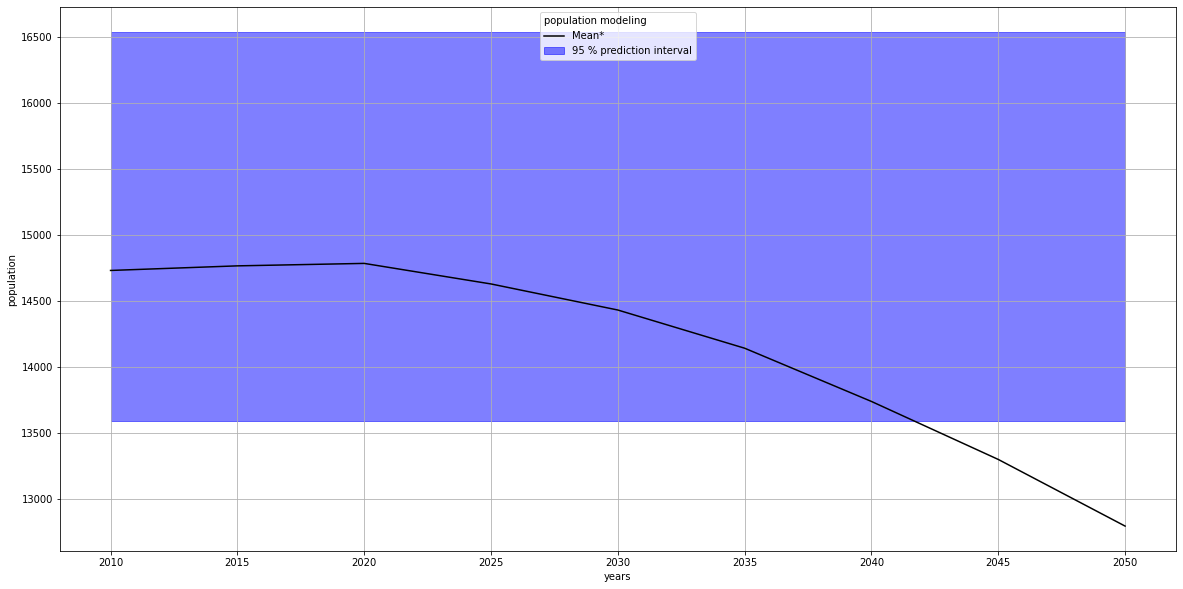

In [ ]:
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(dp.Reference_date.values.tolist(),
         dp.Popularity.values.tolist(), label="Mean*", color='black')

# in percent
prediction_interval = 95

# dif = [i+1 for i in dp.Popularity.values.tolist()]
# dif = [i+1 for i in zip()]
# dif = [i-j for i, j in zip(
#     dp.Popularity.values.tolist(),
#     [Model(Si['S1']) for _ in range(dp.shape[0])]
# )
# ]
# dif = [14000 * random.randint(1,4) for i in range(dp.shape[0])]

ax0.fill_between(
    dp.Reference_date.values.tolist(),
    np.percentile(Y['2025'], 50 - prediction_interval/2., axis=0),
    np.percentile(Y['2025'], 50 + prediction_interval/2., axis=0),
    alpha=0.5, color='b',
    label=f"{prediction_interval} % prediction interval"
)

ax0.set_xlabel("years")
ax0.set_ylabel("population")
ax0.legend(title=r"population modeling",
           loc='upper center')._legend_box.align = "left"

plt.grid()

plt.savefig('sensitivity.png', bbox_inches='tight')


In [ ]:
print("x1-x2:", Si['S2'][0,1])
print("x1-x3:", Si['S2'][0,2])
print("x2-x3:", Si['S2'][1,2])

x1-x2: 0.10313963761191508
x1-x3: 0.0657561980723175
x2-x3: -0.010095674540450988


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

<Figure size 800x800 with 0 Axes>

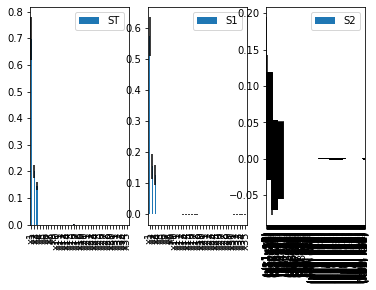

In [ ]:
figure(figsize=(10, 10))
Si.plot()

In [ ]:
# S1s = np.array([s['S1'] for s in Si])
S1s = Si['S1']

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

x = np.linspace(-1, 1, 100)
y = Y
for i, ax in enumerate([ax1, ax2]):
    ax.plot(x, S1s,
            label=r"S1$_\mathregular{{{}}}$".format(problem["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# in percent
prediction_interval = 95

ax0.fill_between(x,
                 np.percentile(y, 50 - prediction_interval/2., axis=0),
                 np.percentile(y, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='black',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.legend(title=r"$y=a+b\cdot x^2$",
           loc='upper center')._legend_box.align = "left"

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [ ]:
def parabola(x, a, b):
    """Return y = a + b*x**2."""
    return a + b*x**2

In [ ]:
problem = {
    'num_vars': 2,
    'names': ['a', 'b'],
    'bounds': [[0, 1]]*2
}

In [ ]:
# sample
param_values = saltelli.sample(problem, 2**6)

# evaluate
x = np.linspace(-1, 1, 200)
y = np.array([parabola(x, *params) for params in param_values])

# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

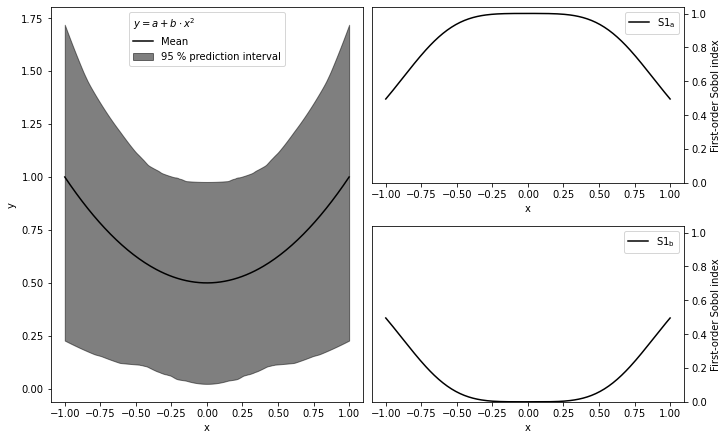

In [ ]:
# sobol examlpe
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax1, ax2]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# in percent
prediction_interval = 95

ax0.fill_between(x,
                 np.percentile(y, 50 - prediction_interval/2., axis=0),
                 np.percentile(y, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='black',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.legend(title=r"$y=a+b\cdot x^2$",
           loc='upper center')._legend_box.align = "left"

plt.show()